<font size=7>Instant Firing Rate -  Analysis

This code is used to make the "latency rasters" a spike raster which show where the "neurons" are eplaced by pairs of neurons, and the "spikes" display when one particular neuron fires before the other (within a 15ms window).

# <font color="green">Set Up Notebook

In [27]:
#import warnings
#warnings.filterwarnings("ignore")

In [1]:
%run "/workspaces/human_hippocampus/dev/elliott/Cross_Correlation/Instant_Firing_Rate_Source_Code.ipynb"

In [2]:
#from human_hip.basics import read_phy_files
from human_hip import latencies

ImportError: cannot import name 'get_latencies' from 'human_hip.latencies.latency_pairs' (/workspaces/human_hippocampus/src/human_hip/latencies/latency_pairs.py)

In [31]:
#%run "/workspaces/human_hippocampus/dev/elliott/Latencies/Latencies_Source_Code.ipynb"

load data

In [3]:
import pickle
file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/sd_ca1_curated.pkl', 'rb')
sd = pickle.load(file)
file.close()

# <font color="green">Curation 1 - Basics

### STTC Theshold

get all latencies whose STTC is above some minimum STTC cuttoff

In [32]:
sttc_delta = 20
sttc_neo = sd.spike_time_tilings( 20 )    # sttc matrix
sttc_cutoff = 0.04   

pairs = []                            # get list (without duplicates) of all pairs above cutoff (excluding diagonal)
for i in range(sd.N):
    for j in range(i+1,sd.N):
        if sttc_neo[i,j] > sttc_cutoff:
            pairs.append([i,j])

In [33]:
len(pairs)

617

### Latencies Threshold

Get all latencies whose median latency is above 1 ms Latency Cuttoff

In [34]:
pairs_late = []
lags_late = []
for pair in pairs:
    latencies = latencies.getLatencies( pair[0], pair[1], sd, ms_cutoff=20)
    latency= np.median(latencies)
    if abs(latency)>1:
        pairs_late.append( pair )
        lags_late.append( latency )
pairs= np.array(pairs_late)
lags= np.array(lags_late)

AttributeError: module 'human_hip.latencies' has no attribute 'getLatencies'

In [20]:
pairs

array([[  0,   1],
       [  0,   4],
       [  0,   6],
       [  0,   9],
       [  0,  10],
       [  0,  23],
       [  0,  24],
       [  0,  32],
       [  0,  33],
       [  0,  39],
       [  0,  45],
       [  0,  46],
       [  0,  53],
       [  0,  54],
       [  0,  61],
       [  0,  62],
       [  0,  73],
       [  0,  80],
       [  0,  90],
       [  0,  98],
       [  0, 109],
       [  0, 111],
       [  0, 114],
       [  0, 122],
       [  0, 127],
       [  0, 134],
       [  0, 135],
       [  1,   6],
       [  1,  10],
       [  1,  23],
       [  1,  32],
       [  1,  33],
       [  1,  35],
       [  1,  39],
       [  1,  46],
       [  1,  62],
       [  1,  86],
       [  1, 121],
       [  1, 127],
       [  1, 137],
       [  2,  32],
       [  2,  36],
       [  2,  39],
       [  2,  48],
       [  2,  53],
       [  2,  54],
       [  2,  61],
       [  2,  62],
       [  2,  73],
       [  2,  86],
       [  3,  32],
       [  3,  73],
       [  4,

In [7]:
len(pairs_late)

388

In [11]:
#lags_late

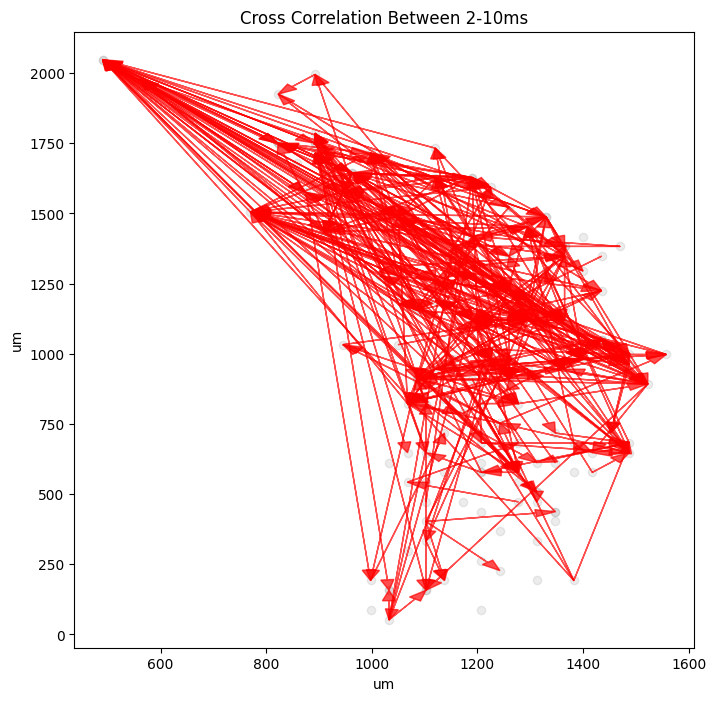

In [13]:
plotLagsLayout(sd, lags_late, pairs_late)

In [15]:
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)

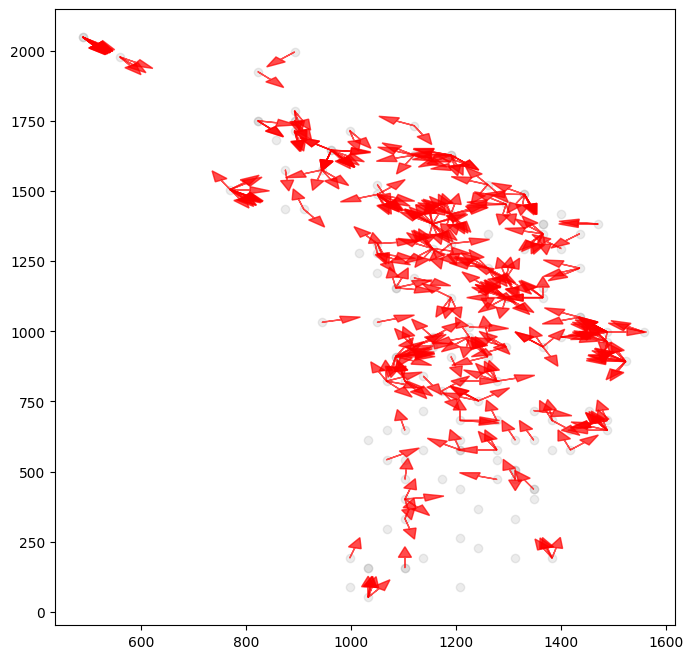

In [23]:
latencies.vector_plot( pairs, lags, neuron_xy)

In [22]:
neuron_xy[ pairs[:,0]  ]

array([[ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [ 770. , 1505. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],
       [1155. , 1295. ],


#  <font color="red">Curation 2 - Cross STTC

## <font color="blue"> crossSTTC function

In [9]:
def crossSTTC( n1, n2, sd, delt ):
    assert len(sd.neuron_attributes) == len(sd.train) 
    sttcs = []
    for i in range(-1000,1001):
        sd.train.append( sd.train[n1]+i )
        sttcs.append( sd.spike_time_tiling( len(sd.neuron_attributes) , n2, delt= delt) )
        sd.train.pop(-1)
    return np.array(sttcs)

## cross STTC across all paris

do cross sttc for all pairs

In [10]:
cross_lag  = []
cross_sttc = []
cross_sttcs = []
count = 0
cross_sttc_delta = 20
for pair in pairs_late:
    count+=1
    if count%20 ==0:
        print(count)
    sttcs = crossSTTC( pair[0], pair[1], sd, delt=cross_sttc_delta)
    cross_sttcs.append(sttcs)
    cross_sttc.append( np.amax(sttcs) )
    max_args = np.argwhere(sttcs == np.amax(sttcs)) - 1000 
    cross_lag.append( max_args[np.argmin(np.abs(max_args))][0] )
cross_lag = np.array(cross_lag)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


## Curate Pairs

Get pairs where max cross correlation is between some cutoff

In [11]:
min_lag_cutoff = 2
max_lag_cutoff = 15
to_keep = np.where((np.abs(cross_lag)< max_lag_cutoff) & (np.abs(cross_lag)> min_lag_cutoff) & (cross_lag!=0) )[0]

In [12]:
to_keep

array([  1,   9,  10,  23,  27,  29,  33,  35,  37,  48,  52,  54,  56,
        63,  75,  79,  85,  87,  90,  92,  94,  95,  97, 101, 106, 114,
       117, 128, 144, 148, 160, 163, 164, 166, 168, 170, 174, 178, 180,
       184, 189, 192, 195, 198, 207, 208, 211, 234, 236, 240, 242, 255,
       259, 261, 262, 263, 274, 277, 280, 285, 286, 287, 300, 304, 305,
       307, 313, 323, 332, 339, 348, 351, 367, 372, 377, 378, 381, 383,
       386])

In [18]:
#pairs_corr

In [13]:
len(to_keep)

79

In [23]:
len(to_keep)

79

In [14]:
pairs_corr = np.array(pairs)[ to_keep ] 
lags_corr = np.array(cross_lag)[to_keep]
sttcs_corr = np.array(cross_sttcs)[to_keep]

In [15]:
import warnings
warnings.filterwarnings("ignore")

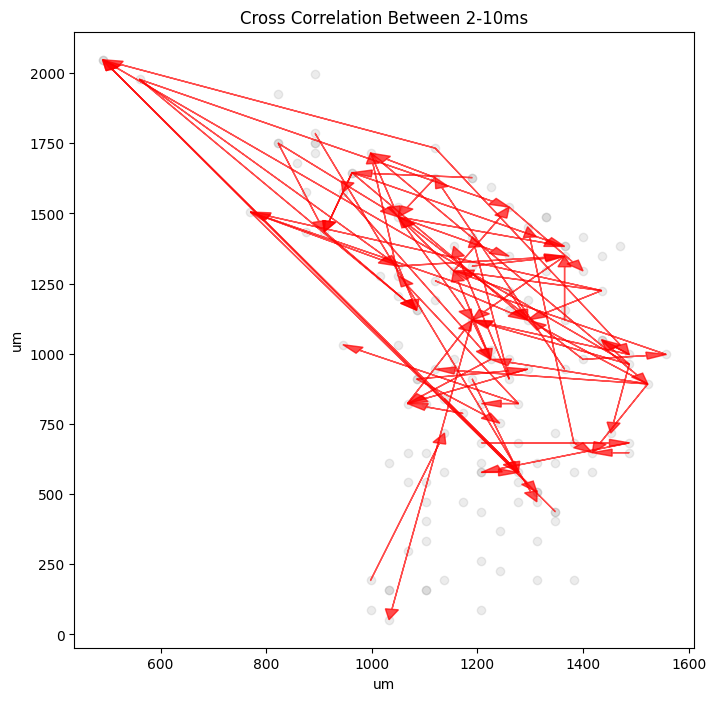

In [16]:
#print(f"Delta: 30, Lag_Cutoff: 10")
#print(f"Delta: {delta}, Lag_Cutoff: {lag_cutoff}")
plotLagsLayout(sd, lags_corr, pairs_corr)


## <font color="green">Save results

get neurons x/y locations for saving

In [24]:
neuron_xy = []
for neuron in sd.neuron_data[0].values():
    neuron_xy.append( [neuron['position'][0], neuron['position'][1]] )
neuron_xy = np.array(neuron_xy)

save data

In [25]:
arrows_data= {"pairs":pairs_corr, "lags":lags_corr, "neuron_xy":neuron_xy, "sttcs":sttcs_corr, "sttc_delta":sttc_delta,  "cross_sttc_delta":cross_sttc_delta,
              "min_lag_cutoff":min_lag_cutoff, "max_lag_cutoff":max_lag_cutoff }

The following line saves data, it's commented out so to not accidently overwrite data

In [26]:
# with open( '/workspaces/human_hippocampus/data/arrows/pairs/deltas_20ms_cuttoff_2_15ms.pkl' , 'wb') as file:
#    pickle.dump( arrows_data, file)

# <font color="red"> Curation 3 - TJ

In [ ]:
#arrows_data= {"pairs":pairs_corr, "lags":lags_corr, "sttcs":sttcs_corr, "sttc_delta_1":delta,  "":lag_cutoff}

In [ ]:
#with open( '/workspaces/human_hippocampus/data/arrows/pairs/deltas_20ms_cuttoff_2_15ms.pkl' , 'wb') as file:
#    pickle.dump(ar file)

## <font color="red"> Analyze STTC

 crossSTTC values

In [17]:
@interact_manual
def showSttcs(num=(0,len(sttcs_corr)-1)):
    plt.plot( sttcs_corr[num] )

interactive(children=(IntSlider(value=39, description='num', max=78), Button(description='Run Interact', style…

In [ ]:
#lags_corr
#pairs_corr

get lags to all be positive, switch pairs accordingly

In [34]:
for i in np.where( lags_corr <0 )[0]:
    pairs_corr[i] =  [ pairs_corr[i][1], pairs_corr[i][0] ]
lags_corr = np.abs(lags_corr)

plot latency analysis for single pair

In [24]:
@interact_manual(num=(0,len(pairs_corr)-1))
def analyzePair(num):
    plotPairAnalysis( pairs_corr[num][0], pairs_corr[num][1], sd)

interactive(children=(IntSlider(value=39, description='num', max=78), Button(description='Run Interact', style…

# <font color="red"> Analyze Instant Firing Rate

calculate all cross correlations

In [115]:
smoothing = 30
max_isi = 0.035

In [116]:
lags_ifr = []
count = 0
for pair in pairs:
    count +=1 
    if count%100 ==0:
        print(count)
    instant_n1 = movingAverage( instantFiringRate( sd, pair[0], max_isi= max_isi), smoothing) #,max_isi=0.1) , 12)
    instant_n2 = movingAverage( instantFiringRate( sd, pair[1], max_isi= max_isi), smoothing) #,max_isi=0.1) , 12)
    lags_ifr.append( maxCorrelationShift( instant_n1, instant_n2 ) )

100
200
300


Get all correlations between 2-10ms

In [117]:
lag_cutoff = 15
to_keep = np.where((np.abs(lags_ifr)< lag_cutoff) & (np.abs(lags_ifr)> 1) & (lags_ifr!=0) )[0]
len(to_keep)

36

In [118]:
pairs_ifr = np.array(pairs)[ to_keep ] 
lags_ifr = np.array(lags_ifr)[to_keep]

In [40]:
#print(f"Delta: 30, Lag_Cutoff: 10")
print(f"max_isi: {max_isi}, Smoothing: {smoothing}, Lag_Cutoff: {lag_cutoff}")
plotLagsLayout(sd, lags_ifr, pairs_ifr)

NameError: name 'max_isi' is not defined

make all lags positive, switch values in pair when needed

In [121]:
for i in np.where( lags_ifr <0 )[0]:
    pairs_ifr[i] =  [ pairs_ifr[i][1], pairs_ifr[i][0] ]
lags_corr = np.abs(lags_ifr)

Analyze latencies

In [22]:
@interact_manual(num=(0,len(pairs_ifr)-1))
def analyzePair(num):
    plotPairAnalysis( pairs_ifr[num][0], pairs_ifr[num][1], sd)

NameError: name 'pairs_ifr' is not defined

# <font color="red"> Create Direction Raster

Create a pickle file of each time an arrow "fires"

In [87]:
latency_times = {}
for pair in pairs_corr:
    #latency_times[ (pair[0],pair[1]) ] = getLatencyTimes( pair[0], pair[1], sd, ms_cutoff=15, directed=False)
    latency_times[ (pair[0],pair[1]) ] =  getLatencyTimes( pair[0], pair[1], sd, ms_cutoff=15, directed=True )

In [88]:
file = open('/home/jovyan/work/Human_Hippocampus/2023_04_02_directed_latency_times_3.pkl', 'wb')
pickle.dump(latency_times, file)
file.close()


In [34]:
#latency_times

{(0,
  1): array([  2414.65,  19076.05,  19724.8 ,  24450.55,  25065.4 ,  25552.45,
         25775.45,  42421.5 ,  42461.45,  46608.7 ,  57111.5 ,  57495.7 ,
         78883.65,  83958.55,  84205.4 ,  85694.25,  89732.2 ,  97890.4 ,
        100781.55, 101212.35, 103063.45, 103196.1 , 105328.4 , 107400.25,
        108520.9 , 110621.1 , 112094.55, 112254.05, 117964.55, 118491.1 ,
        122040.35, 122658.4 , 122716.95, 125142.55, 125560.75, 129700.35,
        130041.45, 132366.  , 132935.5 , 134125.2 , 137563.25, 138486.4 ,
        141534.65, 142580.7 , 143319.75, 148542.4 , 149791.9 , 153508.7 ,
        154044.65, 157244.55, 160320.6 , 160778.65, 164581.8 , 165502.6 ,
        167053.3 , 167093.2 , 170508.05, 171020.75, 172312.8 , 185571.7 ,
        186287.9 , 188262.  , 188578.6 , 189174.65, 192442.65, 195522.55,
        201414.25, 203483.3 , 204426.95, 206272.5 , 206864.6 , 208935.05,
        212007.85, 212591.15, 213647.25, 217212.45, 219805.5 , 220097.7 ,
        227016.3 , 229124.5 

# <font color="brown">Safety Code